In [3]:
from google.colab import files
uploaded = files.upload()


Saving customer_shopping_data.csv to customer_shopping_data.csv


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("/content/customer_shopping_data.csv")
df.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [6]:
X = df[['age', 'quantity', 'price']]


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [9]:
df.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Cluster
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,0
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,0
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,2
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,0
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,1


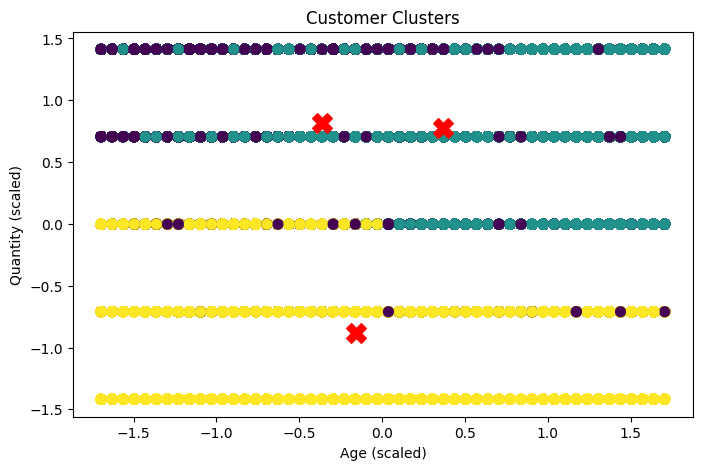

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.xlabel("Age (scaled)")
plt.ylabel("Quantity (scaled)")
plt.title("Customer Clusters")
plt.show()


In [11]:
from google.colab import files
df.to_csv("clustered_customers.csv", index=False)
files.download("clustered_customers.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>